Importing ML Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import librosa as lb


Loading Datasets in Numpy Arrays

In [ ]:
segment2_MelEnergy = np.loadtxt('/content/drive/MyDrive/PR_A1_data/assign1_data/q1/Segment2_MelEnergy.csv', delimiter=',')
segment2_STEnergy = np.loadtxt('/content/drive/MyDrive/PR_A1_data/assign1_data/q1/Segment2_STEnergy.csv', delimiter=',')
segment2_GT = np.loadtxt('/content/drive/MyDrive/PR_A1_data/assign1_data/q1/Segment2_VAD_GT.csv', delimiter=',')
segment3_MelEnergy = np.loadtxt('/content/drive/MyDrive/PR_A1_data/assign1_data/q1/Segment3_MelEnergy.csv', delimiter=',')
segment3_STEnergy = np.loadtxt('/content/drive/MyDrive/PR_A1_data/assign1_data/q1/Segment3_STEnergy.csv', delimiter=',')
segment3_GT = np.loadtxt('/content/drive/MyDrive/PR_A1_data/assign1_data/q1/Segment3_VAD_GT.csv', delimiter=',')


Plotting Energy vs Frame of Training and Testing Data

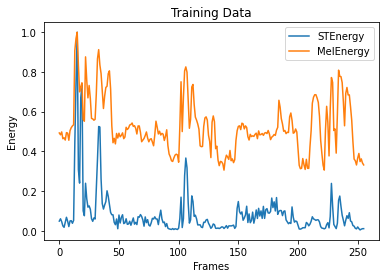

In [ ]:
plt.plot(segment2_STEnergy)
plt.plot(segment2_MelEnergy)
plt.xlabel("Frames")
plt.ylabel("Energy")
plt.title("Training Data")
plt.legend(['STEnergy','MelEnergy'])


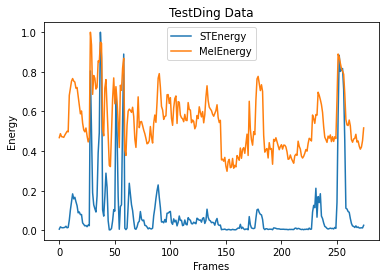

In [ ]:
plt.plot(segment3_STEnergy)
plt.plot(segment3_MelEnergy)
plt.xlabel("Frames")
plt.ylabel("Energy")
plt.title("TestDing Data")
plt.legend(['STEnergy','MelEnergy'])


In [ ]:
speech_seg2_MelEnergy = []
non_speech_seg2_MelEnergy = []
speech_seg2_STEnergy = []
non_speech_seg2_STEnergy = []

for gt in range(len(segment2_GT)):
  if segment2_GT[gt]==1:
    speech_seg2_MelEnergy.append(segment2_MelEnergy[gt])
    speech_seg2_STEnergy.append(segment2_STEnergy[gt])
  else:
    non_speech_seg2_MelEnergy.append(segment2_MelEnergy[gt])
    non_speech_seg2_STEnergy.append(segment2_STEnergy[gt])

# print(speech_seg2_MelEnergy)



Count of Speech and Non_Speech Frames

In [ ]:
no_of_speech_frames_MelEnergy = len(speech_seg2_MelEnergy)
no_of_non_speech_frames_MelEnergy = len(non_speech_seg2_MelEnergy)
no_of_speech_frames_STEnergy = len(speech_seg2_STEnergy)
no_of_non_speech_frames_STEnergy = len(non_speech_seg2_STEnergy)
total_frames = len(segment2_GT)
print(no_of_non_speech_frames_MelEnergy)

145


Prior Probability


In [ ]:
prior_speech_seg2_MelE = no_of_speech_frames_MelEnergy/total_frames
prior_non_speech_seg2_MelE = no_of_non_speech_frames_MelEnergy/total_frames
prior_speech_seg2_STE = no_of_speech_frames_STEnergy/total_frames
prior_non_speech_seg2_STE = no_of_non_speech_frames_STEnergy/total_frames

print(prior_speech_seg2_STE)

0.43359375


Mean and Standard Deviation of Speech and Non_Speech

In [ ]:
mean_speech_seg2_MELEnergy = np.mean(speech_seg2_MelEnergy)
mean_non_speech_seg2_MELEnergy = np.mean(non_speech_seg2_MelEnergy)
std_speech_seg2_MELEnergy = np.std(speech_seg2_MelEnergy)
std_non_speech_seg2_MELEnergy = np.std(non_speech_seg2_MelEnergy)

mean_speech_seg2_STEnergy = np.mean(speech_seg2_STEnergy)
mean_non_speech_seg2_STEnergy = np.mean(non_speech_seg2_STEnergy)
std_speech_seg2_STEnergy = np.std(speech_seg2_STEnergy)
std_non_speech_seg2_STEnergy = np.std(non_speech_seg2_STEnergy)
print(mean_speech_seg2_STEnergy)
print(mean_non_speech_seg2_STEnergy )


0.12043432332432433
0.053090674108275865


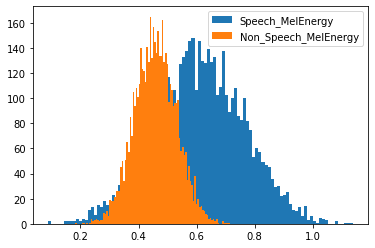

In [ ]:
speech_MelE_s2 = np.random.normal(mean_speech_seg2_MELEnergy,std_speech_seg2_MELEnergy,5000)
non_speech_MelE_s2 = np.random.normal(mean_non_speech_seg2_MELEnergy,std_non_speech_seg2_MELEnergy,5000)

plt.hist(speech_MelE_s2,bins=100)
plt.hist(non_speech_MelE_s2,bins=100)
plt.legend(['Speech_MelEnergy','Non_Speech_MelEnergy'])
plt.show()

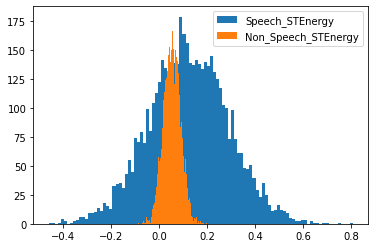

In [ ]:
speech_STE_s2 = np.random.normal(mean_speech_seg2_STEnergy,std_speech_seg2_STEnergy,5000)
non_speech_STE_s2 = np.random.normal(mean_non_speech_seg2_STEnergy,std_non_speech_seg2_STEnergy,5000)

plt.hist(speech_STE_s2,bins=100)
plt.hist(non_speech_STE_s2,bins=100)
plt.legend(['Speech_STEnergy','Non_Speech_STEnergy'])
plt.show()

Probability Distribution (Class conditional Probability)

In [ ]:
def normal_dist(x , mean , sd):
    prob_density = (np.pi*sd) * np.exp(-0.5*((x-mean)/sd)**2)
    return prob_density

Testing

In [ ]:
pdf_speech_MelE = []
pdf_non_speech_MelE = []
for x_test in segment3_MelEnergy:
  # print(x)
  pdf_x_given_speech = normal_dist(x_test,mean_speech_seg2_MELEnergy,std_speech_seg2_MELEnergy)
  pdf_speech_MelE.append(pdf_x_given_speech)
for x_test in segment3_MelEnergy:
  pdf_x_given_non_speech = normal_dist(x_test,mean_non_speech_seg2_MELEnergy,std_non_speech_seg2_MELEnergy)
  pdf_non_speech_MelE.append(pdf_x_given_non_speech)


pdf_speech_STE = []
pdf_non_speech_STE = []
for x_test in segment3_STEnergy:
  # print(x)
  pdf_x_given_speech = normal_dist(x_test,mean_speech_seg2_STEnergy,std_speech_seg2_STEnergy)
  pdf_speech_STE.append(pdf_x_given_speech)
for x_test in segment2_STEnergy:
  pdf_x_given_non_speech = normal_dist(x_test,mean_non_speech_seg2_STEnergy,std_non_speech_seg2_STEnergy)
  pdf_non_speech_STE.append(pdf_x_given_non_speech)  
# print(pdf_non_speech_MelE)

Evidence

In [ ]:
evidence_x_MelE =[]
for i in range(len(segment2_MelEnergy)):
  speech = pdf_speech_MelE[i]*prior_speech_seg2_MelE
  non_speech = pdf_non_speech_MelE[i]*prior_non_speech_seg2_MelE
  total = speech + non_speech
  evidence_x_MelE.append(total)
print(evidence_x_MelE)
evidence_x_STE =[]
for i in range(len(segment2_STEnergy)):
  speech_STE = pdf_speech_STE[i]*prior_speech_seg2_STE
  non_speech_STE = pdf_non_speech_STE[i]*prior_non_speech_seg2_STE
  total_STE = speech_STE + non_speech_STE
  evidence_x_STE.append(total_STE)
print(evidence_x_STE)

[0.2596579528971417, 0.26666094393915285, 0.2623277908563759, 0.26166199564139137, 0.26046899600330914, 0.26520650233333953, 0.26691284714054286, 0.2667394592512711, 0.2669664445287506, 0.1852717779294789, 0.16073794603222244, 0.13164492056643848, 0.1208020393225178, 0.13135376517070285, 0.13535451854666986, 0.1603980543158358, 0.1573586382334052, 0.18779021598636172, 0.20836503149138014, 0.22929102823905234, 0.22306811930405415, 0.25202662911802864, 0.2656374941437083, 0.2669509768291722, 0.26284686094978577, 0.26398310915440487, 0.24093553083332683, 0.2590298535428067, 0.007411764783654312, 0.02005828311718517, 0.18205566019042121, 0.10814356965603124, 0.11938159374543743, 0.16354085335387644, 0.15641976182197387, 0.055432526226628566, 0.058459728593649715, 0.016628657712005442, 0.017784354641819874, 0.26405121444468616, 0.26410957695403486, 0.15996459060445456, 0.1250796394223524, 0.21327677013879143, 0.2643977252393816, 0.06137592777451835, 0.054796753608217064, 0.26704478188067504

Posterior Probability

In [ ]:
posterior_prob_speech_MelE=[]
for i in range(len(segment2_MelEnergy)):
  prob_speech_given_x = (pdf_speech_MelE[i]*prior_speech_seg2_MelE)/evidence_x_MelE[i]
  posterior_prob_speech_MelE.append(prob_speech_given_x)
# print(posterior_prob_speech)

posterior_prob_speech_STE=[]
for i in range(len(segment2_STEnergy)):
  prob_speech_given_x = (pdf_speech_STE[i]*prior_speech_seg2_STE)/evidence_x_STE[i]
  posterior_prob_speech_STE.append(prob_speech_given_x)
print(posterior_prob_speech_STE)


[0.7382756843293259, 0.749179700742791, 0.7463506436463616, 0.7976514917919525, 0.8253421653361351, 0.7521459593077784, 0.7631270902320535, 0.7437948339756404, 0.8114173778370202, 0.7654657458488499, 0.7791942292204795, 0.7935306931828886, 0.7668625515545643, 1.0, 1.0, 1.0, 0.999999999996792, 0.9999996088594899, 1.0, 1.0, 0.8906618742887411, 0.7922550532316038, 0.9999995031852199, 0.9963933651731484, 0.9411782479420939, 0.9565681428127467, 0.9070358060280925, 0.7538178505542049, 0.0007580927994517967, 0.25429834728753464, 0.767102190170509, 0.9999696181747386, 1.0, 1.0, 1.0, 0.9999999437038528, 0.8101971715843503, 1.0285167583114644e-05, 0.0013066106745406136, 0.9905437599543262, 0.999939293904552, 0.9989334204026089, 0.9636016497296888, 0.8438324613262013, 0.81181011234681, 0.7860397504166717, 0.742412315766737, 0.7756146904915137, 0.7657325395723493, 0.8774943303584135, 0.8206192698734178, 0.00859809733255541, 0.23842394854912138, 0.8193358819732534, 0.7574243910313788, 0.79101148694

In [ ]:

threshold = np.random.uniform(0, 1, 10000)
print(threshold)


[0.96935926 0.84074334 0.27498344 ... 0.29744692 0.52685006 0.65902209]


True Positive Rate nd False Positive Rate

In [ ]:
ROC_points_MelE=[]

for i in range(len(threshold)):
  estimate_op_Mele=[]
  for post in posterior_prob_speech_MelE:
    if post > threshold[i]:
      estimate_op_Mele.append(1)
    else:
      estimate_op_Mele.append(0)
  # print(estimate_op_Mele)
  True_Positive=0
  True_Negative=0
  False_Positive=0
  False_Negative=0
  
  for i in range(len(estimate_op_Mele)):
    if segment3_GT[i]==1 and estimate_op_Mele[i]==1:
      True_Positive+=1
    elif segment3_GT[i]==0 and estimate_op_Mele[i]==0:
      True_Negative+=1
    elif segment3_GT[i]==0 and estimate_op_Mele[i]==1:
      False_Positive+=1
    elif segment3_GT[i]==1 and estimate_op_Mele[i]==0:
      False_Negative+=1
  
  tpr_m = True_Positive/(True_Positive+False_Negative)
  fpr_m = False_Positive/(True_Negative+False_Positive)

  ROC_points_MelE.append([tpr_m,fpr_m])  

In [ ]:
ROC_points_STE=[]

for i in range(len(threshold)):
  estimate_op_STE=[]
  for post in posterior_prob_speech_STE:
    if post > threshold[i]:
      estimate_op_STE.append(1)
    else:
      estimate_op_STE.append(0)
  # print(estimate_op_STE)
  True_Positive=0
  True_Negative=0
  False_Positive=0
  False_Negative=0
  
  for i in range(len(estimate_op_STE)):
    if segment3_GT[i]==1 and estimate_op_STE[i]==1:
      True_Positive+=1
    elif segment3_GT[i]==0 and estimate_op_STE[i]==0:
      True_Negative+=1
    elif segment3_GT[i]==0 and estimate_op_STE[i]==1:
      False_Positive+=1
    elif segment3_GT[i]==1 and estimate_op_STE[i]==0:
      False_Negative+=1
  
  tpr_s = True_Positive/(True_Positive+False_Negative)
  fpr_s = False_Positive/(True_Negative+False_Positive)

  ROC_points_STE.append([tpr_s,fpr_s])
 

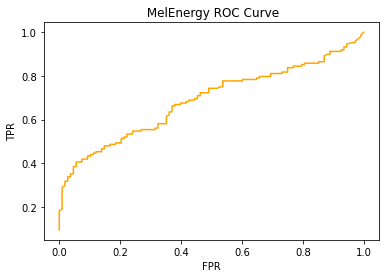

In [ ]:
ROC_points_MelE= sorted(ROC_points_MelE)
roc_dataframe_MelE = pd.DataFrame(ROC_points_MelE,columns=["tpr","fpr"])


plt.plot(roc_dataframe_MelE.fpr,roc_dataframe_MelE.tpr,color="orange")
plt.title(" MelEnergy ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()


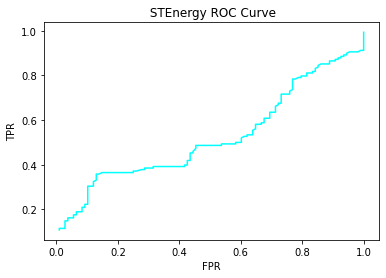

In [ ]:
ROC_points_STE= sorted(ROC_points_STE)
roc_dataframe_STE = pd.DataFrame(ROC_points_STE,columns=["tpr","fpr"])

plt.plot(roc_dataframe_STE.fpr,roc_dataframe_STE.tpr,color="cyan")
plt.title(" STEnergy ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()


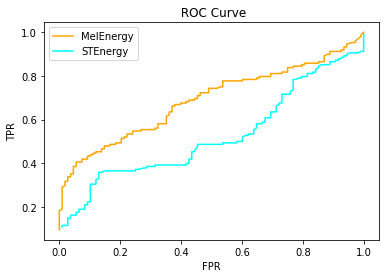

In [ ]:
ROC_points_MelE= sorted(ROC_points_MelE)
ROC_points_STE= sorted(ROC_points_STE)
roc_dataframe_MelE = pd.DataFrame(ROC_points_MelE,columns=["tpr","fpr"])
roc_dataframe_STE = pd.DataFrame(ROC_points_STE,columns=["tpr","fpr"])


plt.plot(roc_dataframe_MelE.fpr,roc_dataframe_MelE.tpr,color="orange")
plt.plot(roc_dataframe_STE.fpr,roc_dataframe_STE.tpr,color="cyan")
plt.title(" ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend(['MelEnergy','STEnergy'])
plt.show()
